MUHAMMAD FARIS RABI
( 09011281823032 )

# DATA LINIER

# Penggunaan dasar SVM

In [1]:
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns
sns.set();

# Membuat kumpulan data linier untuk pelatihan 

In [3]:
X,y = make_blobs(n_samples= 50 , centers = 2, cluster_std = 0.60 , random_state = 0 )
print(X)
print(y)


[[ 1.41281595  1.5303347 ]
 [ 1.81336135  1.6311307 ]
 [ 1.43289271  4.37679234]
 [ 1.87271752  4.18069237]
 [ 2.09517785  1.0791468 ]
 [ 2.73890793  0.15676817]
 [ 3.18515794  0.08900822]
 [ 2.06156753  1.96918596]
 [ 2.03835818  1.15466278]
 [-0.04749204  5.47425256]
 [ 1.71444449  5.02521524]
 [ 0.22459286  4.77028154]
 [ 1.06923853  4.53068484]
 [ 1.53278923  0.55035386]
 [ 1.4949318   3.85848832]
 [ 1.1641107   3.79132988]
 [ 0.74387399  4.12240568]
 [ 2.29667251  0.48677761]
 [ 0.44359863  3.11530945]
 [ 0.91433877  4.55014643]
 [ 1.67467427  0.68001896]
 [ 2.26908736  1.32160756]
 [ 1.5108885   0.9288309 ]
 [ 1.65179125  0.68193176]
 [ 2.49272186  0.97505341]
 [ 2.33812285  3.43116792]
 [ 0.67047877  4.04094275]
 [-0.55552381  4.69595848]
 [ 2.16172321  0.6565951 ]
 [ 2.09680487  3.7174206 ]
 [ 2.18023251  1.48364708]
 [ 0.43899014  4.53592883]
 [ 1.24258802  4.50399192]
 [ 0.00793137  4.17614316]
 [ 1.89593761  5.18540259]
 [ 1.868336    0.93136287]
 [ 2.13141478  1.13885728]
 

# Model SVM 

In [4]:
from sklearn.svm import SVC
model = SVC(kernel='linear' , C=1E10)
model.fit(X,y) #give the data points and the variance to model

#output is not so interpretable so lets code for SVM graph plot

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Fungsi plot grafik untuk SVM

In [5]:
def svc_plot(model,ax=None,plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    #grid creation for model evaluation 
    x =np.linspace(xlim[0],xlim[1],30)
    y= np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = (np.vstack([X.ravel(),Y.ravel()]).T)
    P = model.decision_function(xy).reshape(X.shape)
    
    #plot Decision Boundaries with margins
    ax.contour(X,Y,P,colors='k' , levels = [-1,0,1],alpha = 0.5,linestyles=['--','-','--'])
    
    #support vector 
    if plot_support:
        ax.scatter(model.support_vectors_[:,0] , model.support_vectors_[:,1] , s =300 , linewidth = 1 , facecolors = 'none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    
        

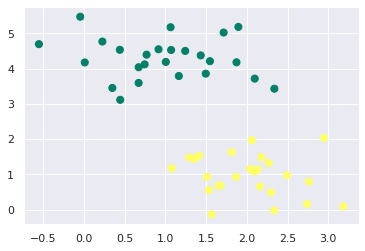

In [17]:
plt.scatter(x[:,0],x[:,1],c=y , s=50 , cmap='summer');

# Klasifikasi

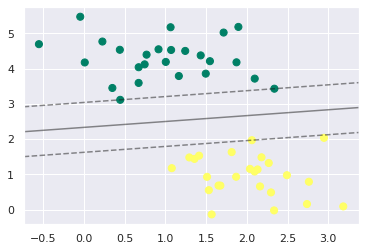

In [8]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="summer");
svc_plot(model)


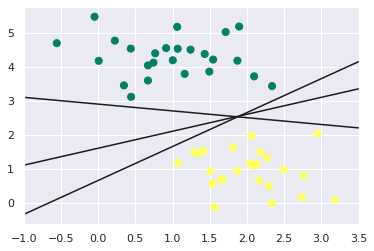

In [16]:
xfit = np.linspace(-1,3.5) 
plt.scatter(x[:,0],x[:,1],c=y , s=50,cmap='summer')


for m,c in [(1,0.65),(0.5,1.6),(-0.2,2.9)]:  #values of m,b are found manually
    plt.plot(xfit,m*xfit+c , '-k')          # Y= M*x + C this is used 
    plt.xlim(-1,3.5)

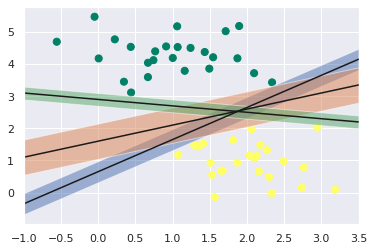

In [15]:
xfit = np.linspace(-1,3.5)
plt.scatter(x[:,0],x[:,1],c=y , s=50,cmap='summer')

for m,c,t in [(1,0.65,0.33),(0.5,1.6,0.55),(-0.2,2.9,0.2)]: 
    yfit = m*xfit+c
    plt.plot(xfit,yfit,'-k')
    plt.fill_between(xfit,yfit-t,yfit+t,alpha = 0.5   )

plt.xlim(-1,3.5); #for seeing our polt in the specific range of X

# Titik-titik yang berpotongan dengan margin adalah Vektor Pendukung

In [10]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

# Terimakasih dan semoga dipermudah saat ujian aamiin yaallah